# Image Classification 3D

> SynapseMNIST3D dataset demo


In [ ]:
#| default_exp tutorial_classification_3D

### Setup imports

In [ ]:
from bioMONAI.data import *
from bioMONAI.transforms import *
from bioMONAI.core import *
from bioMONAI.core import Path
from bioMONAI.losses import *
from bioMONAI.metrics import *
from bioMONAI.datasets import download_medmnist
from bioMONAI.visualize import show_images_grid, mosaic_image_3d
from bioMONAI.data import get_image_files

In [ ]:
device = get_device()
print(device)

cuda


### Download and store the dataset

These lines of code will download the SynapseMNIST3D dataset and set up the paths for training, validation, and test datasets. 

The `download_medmnist` function is used to download the dataset, and the paths are organized to easily access different parts of the dataset for training, validation, and testing purposes. The `data_path` is updated to point to the 'synapsemnist3d' directory, and then separate paths are created for the 'train', 'val', and 'test' subdirectories. This organization helps in easily accessing the different parts of the dataset for training, validation, and testing purposes.

You can customize the `data_flag` to download different datasets available in the MedMNIST collection. Additionally, you can modify the `data_path` to change the location where the dataset is stored. 
If you have a specific directory structure in mind, ensure that the paths for `train_path`, `val_path`, and `test_path` correctly reflect your desired organization. This flexibility allows you to adapt the code to various datasets and storage requirements.

In [ ]:
data_flag = 'synapsemnist3d'
data_path = Path('../_data/medmnist_data/')

info = download_medmnist(data_flag, data_path, download_only=True)

data_path = data_path/'synapsemnist3d'
train_path = data_path/'train'
val_path = data_path/'val'
test_path = data_path/'test'

Dataset 'synapsemnist3d' is already downloaded and available in '../_data/medmnist_data/synapsemnist3d'.


### Create Dataloader

### Customize DataLoader

In the next cell, we will create a DataLoader for the SynapseMNIST3D dataset. The `BioDataLoaders.class_from_folder()` method is used to load the dataset from the specified paths and apply transformations to the images. 

We will set the batch size to 8 and apply the following transformations:
- `ScaleIntensity()`: Scales the intensity of the images.
- `RandRot90(prob=0.5, spatial_axes=(1,2))`: Randomly rotates the images by 90 degrees with a probability of 0.5 along the specified spatial axes.
- `Resize(32)`: Resizes the images to 32x32x32.

You can customize the DataLoader by changing the batch size, adding or removing transformations, or modifying the paths to the dataset. For example, you can increase the batch size for faster training or add more complex transformations to augment the dataset.

The `show_summary` parameter is set to `True` to display a summary of the dataset and transformations applied.

After creating the DataLoader, we will print the number of training and validation images to verify that the dataset has been loaded correctly.

#### Parameters:
- `data_path`: The root directory where the dataset is stored.
- `train`: The subdirectory containing the training images.
- `valid`: The subdirectory containing the validation images.
- `vocab`: The vocabulary or labels for the dataset.
- `item_tfms`: A list of transformations to apply to each image individually. Examples include `ScaleIntensity()`, `RandRot90()`, and `Resize()`.
- `batch_tfms`: A list of transformations to apply to a batch of images. This can be set to `None` if no batch transformations are needed.
- `img_cls`: The class to use for loading images. For 3D images, this is typically `BioImageStack`.
- `bs`: The batch size, which determines how many images are processed together in each batch.
- `show_summary`: A boolean flag to display a summary of the dataset and the transformations applied.

#### Example Usage:

In [ ]:
batch_size = 4

data_ops = {
    'train': 'train',                                       # folder for training data
    'valid': 'val',                                           # folder for validation data
    'vocab': info['label'],                                 # list of class labels
    'img_cls': BioImageStack,                               # class to use for images
    'bs': batch_size,                                       # batch size
    'batch_tfms': None,
    'item_tfms': [ScaleIntensity(),
                RandRot90(prob=0.75, spatial_axes=(1,2)), 
                Resize(32)],
}
data = BioDataLoaders.class_from_folder(
    data_path,                              # root directory for data
    show_summary=False,                     # print summary of the data
    **data_ops,                             # rest of the method arguments
    )

# print length of training and validation datasets
print('train images:', len(data.train_ds.items), '\nvalidation images:', len(data.valid_ds.items))

train images: 1230 
validation images: 177


### Display a Batch of Images

In the next cell, we will display a batch of images from the training dataset using the `show_batch` method of the `BioDataLoaders` class. This method helps visualize the images and their corresponding labels, providing an overview of the dataset.

You can customize the display by modifying the following parameters:
- `max_n`: The maximum number of images to display in the batch. By default, it shows all images in the batch.
- `nrows`: The number of rows to use for displaying the images. This can be adjusted to control the layout of the images.
- `ncols`: The number of columns to use for displaying the images. This can be adjusted to control the layout of the images.
- `figsize`: The size of the figure used to display the images. This can be adjusted to make the images larger or smaller.

For example, you can set `max_n=4` to display only 4 images from the batch, or set `figsize=(10, 10)` to increase the size of the displayed images.

This visualization step is useful for verifying that the images have been loaded and transformed correctly before proceeding with model training.

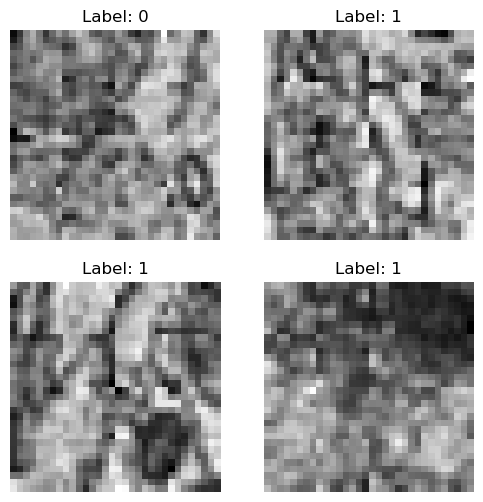

In [ ]:
data.show_batch()

### Load and train a 3D model

### Train the Model

In the next cell, we will initialize and train a 3D model using the `fastTrainer` class. The model architecture used is `SEResNet50`, which is a 3D version of the SE-ResNet50 model. This model is well-suited for 3D image classification tasks.

We will use the following components:
- `SEResNet50`: The model architecture with 3D spatial dimensions, 1 input channel, and 2 output classes.
- `CrossEntropyLossFlat`: The loss function used for training the model.
- `BalancedAccuracy`: The metric used to evaluate the model's performance.
- `fastTrainer`: A custom trainer class to handle the training process.

The `trainer.fit(20)` method will train the model for 20 epochs.

You can customize the training process by modifying the following parameters:
- `model`: Change the model architecture to another 3D model, such as `DenseNet169`.
- `loss_fn`: Use a different loss function, such as `FocalLoss`.
- `metrics`: Add more metrics to evaluate the model, such as `Precision` or `Recall`.
- `show_summary`: Set to `False` if you do not want to display the model summary.
- `find_lr`: Set to `False` if you do not want to find the optimal learning rate.

For example, you can add more metrics to the `metrics` list to get a more comprehensive evaluation of the model's performance.

You can customize the training process by modifying the following parameters:
- `epochs`: Change the number of epochs to train the model for a different duration. For example, you can set it to 50 or 100 epochs.
- `lr`: Adjust the learning rate to control the speed at which the model learns. A lower learning rate can lead to more stable training, while a higher learning rate can speed up the process but may cause instability.
- `callbacks`: Add custom callbacks to monitor the training process, such as early stopping or learning rate schedulers.

For example, you can add an early stopping callback to stop training if the validation loss does not improve for a certain number of epochs. This can help prevent overfitting and save training time.

Additionally, you can experiment with different learning rates to find the optimal value for your dataset. The `find_lr` parameter in the `fastTrainer` class can help you automatically find a suitable learning rate.

By customizing these parameters, you can fine-tune the training process to achieve better performance and adapt the model to your specific dataset and requirements.

SEResNet50 (Input shape: 4 x 1 x 32 x 32 x 32)
Layer (type)         Output Shape         Param #    Trainable 
                     4 x 64 x 16 x 16 x  
Conv3d                                    21952      True      
BatchNorm3d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     4 x 64 x 8 x 8 x 8  
MaxPool3d                                                      
Conv3d                                    4096       True      
BatchNorm3d                               128        True      
ReLU                                                           
Conv3d                                    110592     True      
BatchNorm3d                               128        True      
ReLU                                                           
____________________________________________________________________________
           

Inferred learning rate:  8e-05


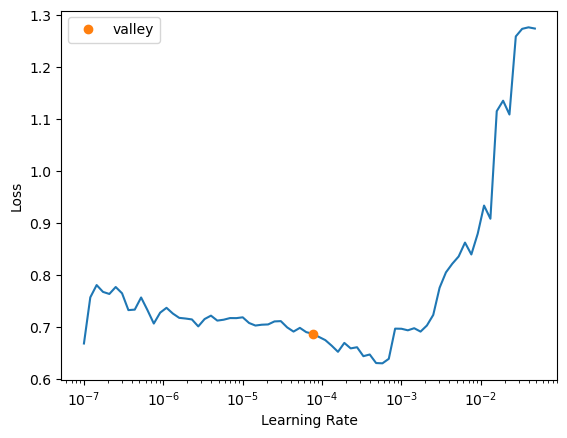

In [ ]:
from monai.networks.nets import SEResNet50
from fastai.vision.all import BalancedAccuracy, CrossEntropyLossFlat

model = SEResNet50(spatial_dims=3, in_channels=1, num_classes=2)

loss = CrossEntropyLossFlat()
metrics = BalancedAccuracy()

trainer = fastTrainer(data, model, loss_fn=loss, metrics=metrics, show_summary=True, find_lr=True)

epoch,train_loss,valid_loss,balanced_accuracy_score,time
0,0.661694,0.606775,0.498789,00:15
1,0.612015,0.593106,0.497578,00:17
2,0.637438,0.660569,0.462936,00:17
3,0.632946,0.583549,0.541909,00:18
4,0.634405,0.603777,0.504118,00:16
5,0.593679,0.588400,0.511870,00:17
6,0.603696,0.603647,0.534157,00:17
7,0.565777,0.654278,0.568556,00:17
8,0.615456,0.624638,0.570010,00:15
9,0.551408,0.593446,0.562742,00:16


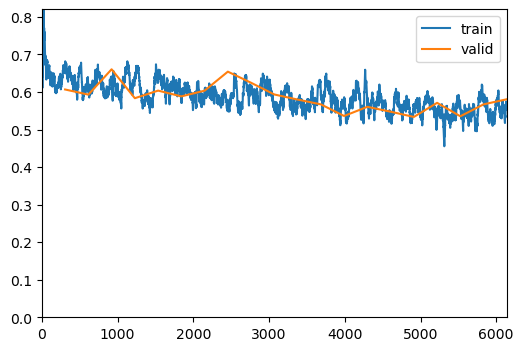

In [ ]:
trainer.fit(20)

### Evaluate the Model on Validation Data

In this step, we will evaluate the trained model on the validation dataset using the `evaluate_classification_model` function. This function computes the specified metrics and provides insights into the model's performance. Additionally, it can display the most confused classes to help identify areas for improvement.

> - You can customize the `metrics` parameter to include other evaluation metrics relevant to your task.
> - The `most_confused_n` parameter specifies the number of most confused classes to display. Adjust this value to see more or fewer confused classes.
> - Set the `show_graph` parameter to `True` to visualize the confusion matrix and other evaluation graphs.
> - Use this evaluation step to monitor the model's performance and make necessary adjustments to the training process or data pipeline.

              precision    recall  f1-score   support

           0       0.55      0.25      0.34        48
           1       0.77      0.92      0.84       129

    accuracy                           0.74       177
   macro avg       0.66      0.59      0.59       177
weighted avg       0.71      0.74      0.70       177


Most Confused Classes:


[('0', '1', 36), ('1', '0', 10)]


,Value
CrossEntropyLossFlat,
Mean,0.587019
Median,0.489525
Standard Deviation,0.249587
Min,0.322135
Max,1.253057
Q1,0.396089
Q3,0.699683


{'CrossEntropyLossFlat': [0.8863237500190735,
  1.1183360815048218,
  0.8573156595230103,
  1.1334142684936523,
  0.6484331488609314,
  1.129358172416687,
  0.8611404299736023,
  0.9286571145057678,
  1.214358925819397,
  0.45560964941978455,
  1.178236961364746,
  0.6221503019332886,
  1.246012806892395,
  1.0428478717803955,
  0.5053641200065613,
  0.916648268699646,
  0.6762295365333557,
  0.9035409688949585,
  1.1084927320480347,
  0.6972817182540894,
  1.253056526184082,
  0.921390175819397,
  0.418337345123291,
  1.2319676876068115,
  0.5910228490829468,
  0.6128923296928406,
  1.0466420650482178,
  0.835457444190979,
  0.6822581887245178,
  0.9162763953208923,
  0.9741742610931396,
  1.014482021331787,
  0.8076924085617065,
  0.7079397439956665,
  1.0930589437484741,
  0.9222192764282227,
  0.8517340421676636,
  1.050678014755249,
  0.9816516637802124,
  0.8517192006111145,
  1.2492965459823608,
  0.7637995481491089,
  0.4299708604812622,
  0.8972944021224976,
  1.23953998088836

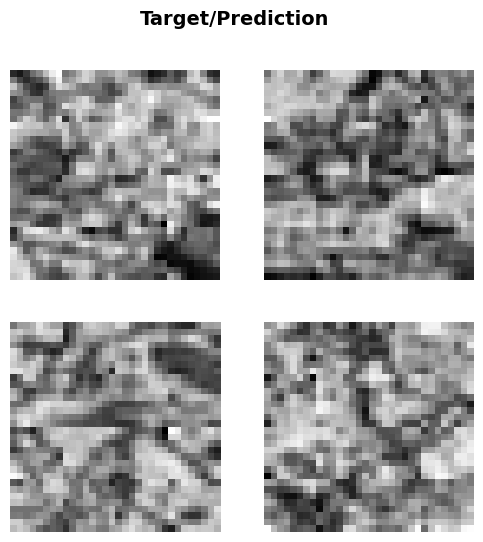

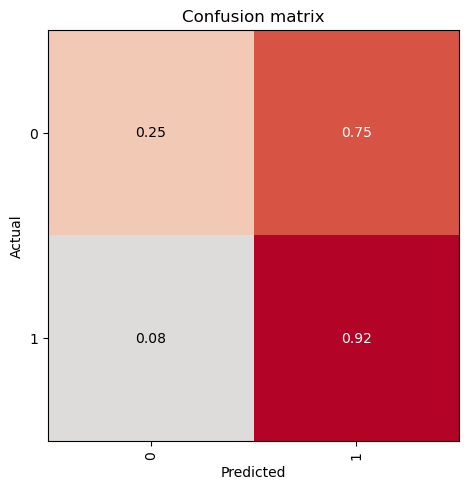

In [ ]:
metrics = BalancedAccuracy()
evaluate_classification_model(trainer,  most_confused_n=5, show_graph=False)

### Save the Trained Model

In the next cell, we will save the trained model to a file using the `save` method of the `fastTrainer` class. This step is important to preserve the trained model so that it can be loaded and used later without retraining.

You can customize the saving process by modifying the following parameters:
- `file_name`: Change the name of the file to save the model with a different name. For example, you can set it to 'final_model' or 'best_model'.
- `path`: Specify a different path to save the model in a different directory. This is useful if you want to organize your saved models in a specific folder.

For example, you can set `file_name='final_model'` to save the model with the name 'final_model.pth', or set `path='../models/'` to save the model in the 'models' directory.

By customizing these parameters, you can ensure that the model is saved with a meaningful name and in an organized manner, making it easier to manage and retrieve the model for future use.

In [ ]:
trainer.save('tmp-model')

Path('../_data/medmnist_data/synapsemnist3d/models/tmp-model.pth')

### Evaluate the Model on Test Data

Here, we will evaluate the performance of the trained model on the test dataset. This step is crucial to understand how well the model generalizes to unseen data.

We will use the `data.test_dl` method to create a DataLoader for the test dataset. The `get_image_files` function is used to retrieve the test images from the specified path. The `with_labels=True` parameter ensures that the test images are loaded with their corresponding labels.

After creating the test DataLoader, we will print the number of test images to verify that the dataset has been loaded correctly.

You can customize the evaluation process by modifying the following parameters:
- `test_path`: Change the path to the test dataset if it is stored in a different location.
- `with_labels`: Set to `False` if the test dataset does not have labels. This is useful for evaluating the model on unlabeled data.
- `batch_size`: Adjust the batch size for the test DataLoader. A larger batch size can speed up the evaluation process but may require more memory.

By customizing these parameters, you can adapt the evaluation process to different datasets and requirements, ensuring that the model's performance is accurately assessed.

In [ ]:
test_data = data.test_dl(get_image_files(test_path), with_labels=True)
# print length of test dataset
print('test images:', len(test_data.items))

test images: 352


In the next cell, we will evaluate the performance of the trained model on the test dataset using the `evaluate_classification_model` function. This function will compute various evaluation metrics and display the results.

You can customize the evaluation process by modifying the following parameters:
- `show_graph`: Set to `True` to display a graph of the evaluation metrics. This can help visualize the model's performance.
- `show_results`: Set to `True` to display the results of the evaluation, including the predicted labels and ground truth labels.

For example, you can set `show_graph=True` to visualize the evaluation metrics, or set `show_results=True` to see the detailed results of the evaluation.

By customizing these parameters, you can gain a deeper understanding of the model's performance and identify areas for improvement. This step is crucial for fine-tuning the model and ensuring that it generalizes well to unseen data.

              precision    recall  f1-score   support

           0       0.46      0.13      0.20        95
           1       0.75      0.95      0.83       257

    accuracy                           0.72       352
   macro avg       0.60      0.54      0.52       352
weighted avg       0.67      0.72      0.66       352


Most Confused Classes:


[('0', '1', 83), ('1', '0', 14)]


,Value
CrossEntropyLossFlat,
Mean,0.588439
Median,0.489406
Standard Deviation,0.251726
Min,0.319300
Max,1.297334
Q1,0.393701
Q3,0.744933


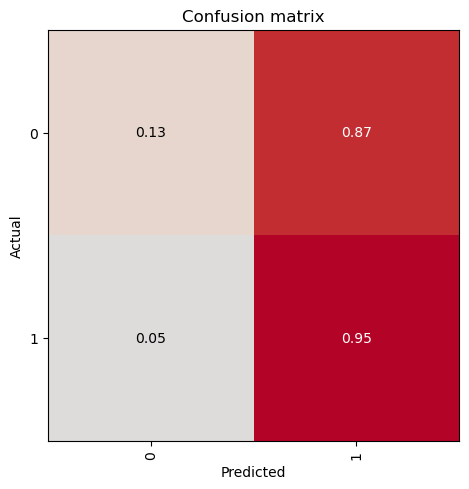

In [ ]:
evaluate_classification_model(trainer, test_data, show_graph=False, show_results=False);

### Load the Model

In this step, we will load the previously trained model using the `load` method of the `visionTrainer` class. In this example, we will:

> - Create a trainer instance and load the previously saved model.
> - Fine tune the model a several epochs more.
> - Evaluate the model with test data again.

SEResNet50 (Input shape: 4 x 1 x 32 x 32 x 32)
Layer (type)         Output Shape         Param #    Trainable 
                     4 x 64 x 16 x 16 x  
Conv3d                                    21952      True      
BatchNorm3d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     4 x 64 x 8 x 8 x 8  
MaxPool3d                                                      
Conv3d                                    4096       True      
BatchNorm3d                               128        True      
ReLU                                                           
Conv3d                                    110592     True      
BatchNorm3d                               128        True      
ReLU                                                           
____________________________________________________________________________
           

Inferred learning rate:  0.0002


y_pred contains classes not in y_true


              precision    recall  f1-score   support

           0       0.46      0.13      0.20        95
           1       0.75      0.95      0.83       257

    accuracy                           0.72       352
   macro avg       0.60      0.54      0.52       352
weighted avg       0.67      0.72      0.66       352


Most Confused Classes:


[('0', '1', 83), ('1', '0', 14)]


,Value
CrossEntropyLossFlat,
Mean,0.588439
Median,0.489406
Standard Deviation,0.251726
Min,0.319300
Max,1.297334
Q1,0.393701
Q3,0.744933


{'CrossEntropyLossFlat': [1.0408622026443481,
  1.1578984260559082,
  0.6881772875785828,
  0.9363319277763367,
  0.9087399244308472,
  1.0826153755187988,
  0.9964368939399719,
  1.2158238887786865,
  1.1089214086532593,
  1.221463918685913,
  1.0761914253234863,
  1.186295509338379,
  0.6786251664161682,
  1.1107286214828491,
  1.145126461982727,
  1.1261001825332642,
  0.9511586427688599,
  0.7463033199310303,
  0.5725147128105164,
  1.1618977785110474,
  0.9097990989685059,
  0.44584038853645325,
  0.8780323266983032,
  0.9188233613967896,
  0.9556930661201477,
  1.1352472305297852,
  0.7040504217147827,
  0.9733481407165527,
  1.0048521757125854,
  0.7980098724365234,
  0.9922673106193542,
  0.869306206703186,
  0.9739875793457031,
  0.37948086857795715,
  1.012920618057251,
  0.8291819095611572,
  0.9980272054672241,
  1.29733407497406,
  0.788002073764801,
  0.9568212032318115,
  0.6713985204696655,
  0.9891518354415894,
  0.7182179093360901,
  0.8292044997215271,
  0.8146789669

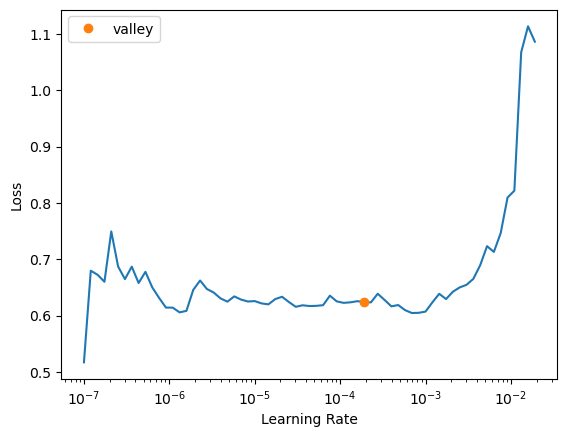

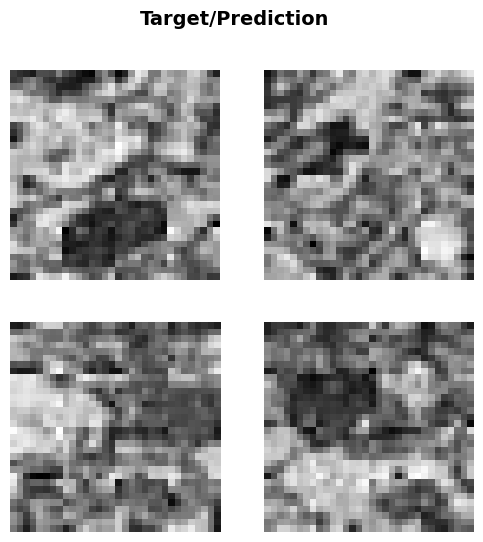

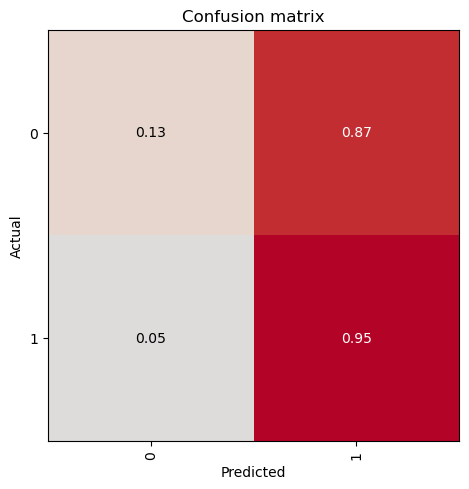

In [ ]:
model = SEResNet50(spatial_dims=3, in_channels=1, num_classes=2)

loss = CrossEntropyLossFlat()
metrics = BalancedAccuracy()

trainer2 = fastTrainer(data, model, loss_fn=loss, metrics=metrics, show_summary=True, find_lr=True)

# Load saved model
trainer2.load('tmp-model')

# Evaluate the model on the test dataset
evaluate_classification_model(trainer2, test_data, show_graph=False)